#Part 1

In [89]:
#Import modules for reading, manipulating and graphing csv files.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

new_df = pd.read_csv('/content/drive/MyDrive/machine_learning/homework/preprocessing_sample_data_missing_vals_new.csv',index_col = 0)

print(new_df)


    weight_kg  overall_length_mm  variety  avg_rating
0         NaN         291.068237        1  216.921532
1    0.008966         178.648431        1  314.967587
2    0.003654                NaN        1  178.361162
3         NaN         130.146299        0  476.198690
4    0.005907                NaN        0  380.775044
..        ...                ...      ...         ...
95        NaN         225.862968        2  277.488788
96   0.008404         184.949744        0  453.836078
97   0.002163         144.079678        1  176.536181
98   0.006581                NaN        1  230.637330
99   0.005291         164.695307        1  226.434244

[100 rows x 4 columns]


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

np.random.seed(5)

fit_data, test_data = train_test_split(new_df, test_size = 0.25)



In [91]:
#print('Sum of Na values in fit data:','\n', fit_data.isna().sum(), '\n',)
#print('Sum of Na values in test data:','\n', test_data.isna().sum(), '\n',)

dropped_fitdata = fit_data.dropna(how = 'any', subset = ['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'])
dropped_testdata = test_data.dropna(how = 'any', subset = ['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'])

print('Fit data:',fit_data.shape)
print('Fit data after removing Na values:', dropped_fitdata.shape)
print('Test data:',test_data.shape)
print('Test data after removing Na values:', dropped_testdata.shape)

Fit data: (75, 4)
Fit data after removing Na values: (46, 4)
Test data: (25, 4)
Test data after removing Na values: (12, 4)


##After removing missing data, the there are 29 less rows in the fit data and 13 less rows in the test data.

In [92]:
print(new_df['variety'].unique())
print(fit_data['variety'].unique())
print(dropped_fitdata['variety'].unique())
print(test_data['variety'].unique())
print(dropped_testdata['variety'].unique())

[1 0 2]
[2 1 0]
[2 1 0]
[2 0 1]
[2 0 1]


In [93]:
df_fit_pd = pd.get_dummies(fit_data, columns=['variety'])
df_test_pd = pd.get_dummies(test_data, columns=['variety'])
df_drop_fit_pd = pd.get_dummies(dropped_fitdata, columns=['variety'])
df_drop_test_pd = pd.get_dummies(dropped_testdata, columns=['variety'])


In [94]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

pp1 = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))
avgrem_fit = df_fit_pd.drop('avg_rating', axis= 'columns')
avgrem_test = df_test_pd.drop('avg_rating', axis= 'columns')

pp1.fit(avgrem_fit, df_fit_pd['avg_rating'])

print('Fit data not dropped Nas:', pp1.score(avgrem_fit, df_fit_pd['avg_rating']))
print('Test data not dropped Nas:',pp1.score(avgrem_test, df_test_pd['avg_rating']))



Fit data not dropped Nas: 0.9079812275416358
Test data not dropped Nas: 0.8273268578141104


Fit data of dropped Nas: 0.9330181607545285
Test data of dropped Nas: 0.9310107520336671


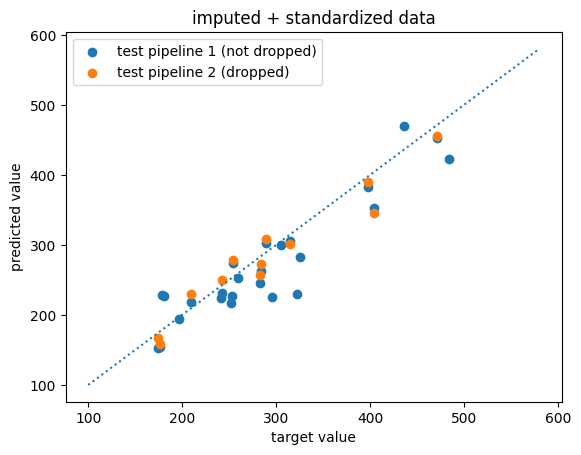

In [95]:
pp2 = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))

avgrem_fitrem = df_drop_fit_pd.drop(columns = 'avg_rating')
avgrem_testrem = df_drop_test_pd.drop(columns = 'avg_rating')

pp2.fit(avgrem_fitrem, df_drop_fit_pd['avg_rating'])

print('Fit data of dropped Nas:',pp2.score(avgrem_fitrem, df_drop_fit_pd['avg_rating']))
print('Test data of dropped Nas:',pp2.score(avgrem_testrem, df_drop_test_pd['avg_rating']))

fig, ax = plt.subplots()


ax.scatter(df_test_pd['avg_rating'], pp1.predict(avgrem_test), label='test pipeline 1 (not dropped)')
ax.scatter(df_drop_test_pd['avg_rating'], pp2.predict(avgrem_testrem), label='test pipeline 2 (dropped)')
ax.plot([100,580],[100,580], ':')
ax.set_xlabel("target value")
ax.set_ylabel("predicted value")
ax.set_title('imputed + standardized data')
ax.legend()
plt.show()
fig.savefig("/t.pdf", bbox_inches='tight')

## Although we use less data by removing missing values, we may be removing non-trivial data. However since the test scores are similar, the guesses are somewhat representative of the distribution.

#Part 2

In [96]:
#Import modules for reading, manipulating and graphing data from csv files.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

missing_df = pd.read_csv('/content/drive/MyDrive/machine_learning/homework/preprocessing_sample_data_missing_vals_alt.csv', index_col = 0)
#There is no categorical data in this dataset.
print(missing_df)


     weight_kg  overall_length_mm      price  avg_rating
0     3.143428           1.490927   2.895001    6.400798
1    10.237233           9.644184   9.635325   30.665897
2    10.547104          11.105189        NaN   36.543178
3    10.655396          10.214400        NaN   33.211331
4     9.180312                NaN  12.319402   30.861946
..         ...                ...        ...         ...
395   2.277471          -0.257703   2.921788    5.996189
396  11.000112                NaN  10.808201   35.646395
397   0.970427           0.663720   1.389433    5.078523
398  10.067480                NaN  10.349453   32.480683
399   2.091234           3.134419   3.206574    9.378688

[400 rows x 4 columns]


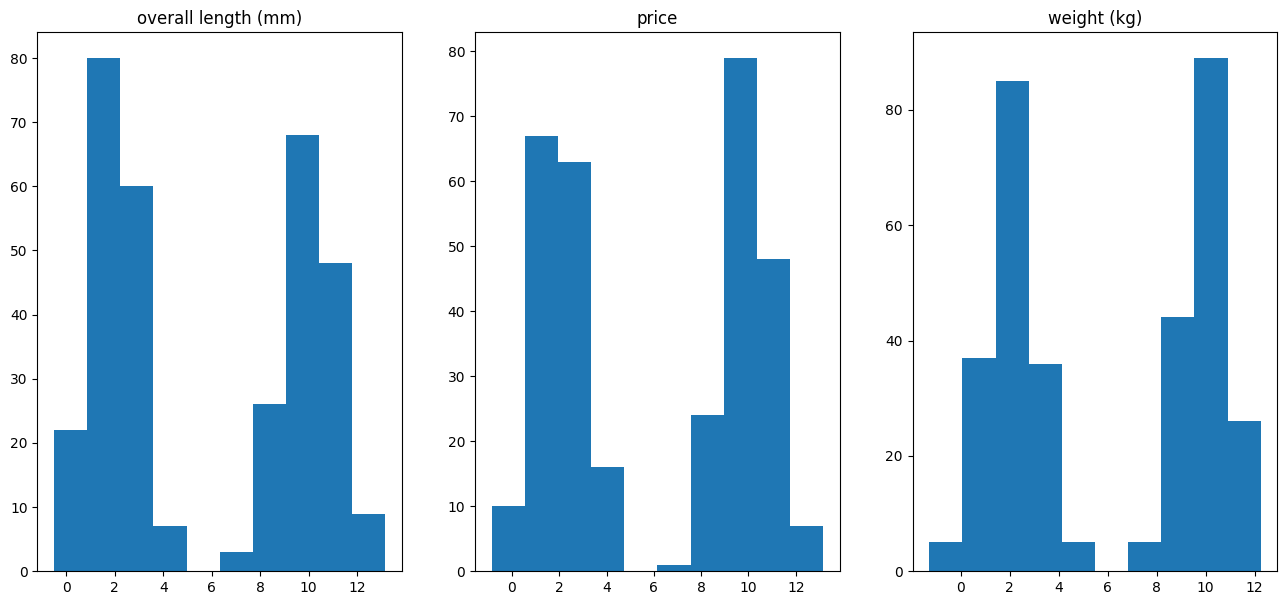

In [97]:
data_x = missing_df[['overall_length_mm']]
data_y = missing_df[['price']]
data_z = missing_df[['weight_kg']]

fig, ax = plt.subplots(1, 3, figsize=(16,7))

ax[0].hist(data_x.values[:,0])
ax[0].set_title('overall length (mm)')

ax[1].hist(data_y.values[:,0])
ax[1].set_title('price')


ax[2].hist(data_z.values[:,0])
ax[2].set_title('weight (kg)')
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

np.random.seed(5)

fit_data2, test_data2 = train_test_split(missing_df, test_size = 0.25)

In [99]:
from sklearn.impute import KNNImputer

pp3 = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))
droppedavg_fit = fit_data2.drop(columns = 'avg_rating')
droppedavg_test = test_data2.drop(columns = 'avg_rating')

pp3.fit(droppedavg_fit, fit_data2['avg_rating'])
print('Test data pipeline 3:',pp3.score(droppedavg_test, test_data2['avg_rating']))


pp4 = make_pipeline(KNNImputer(n_neighbors=5), StandardScaler(), Ridge(alpha=0.01))
pp4.fit(droppedavg_fit, fit_data2['avg_rating'])
print('Test data pipeline 4:', pp4.score(droppedavg_test, test_data2['avg_rating']))

Test data pipeline 3: 0.8793927477274321
Test data pipeline 4: 0.9300514180958818


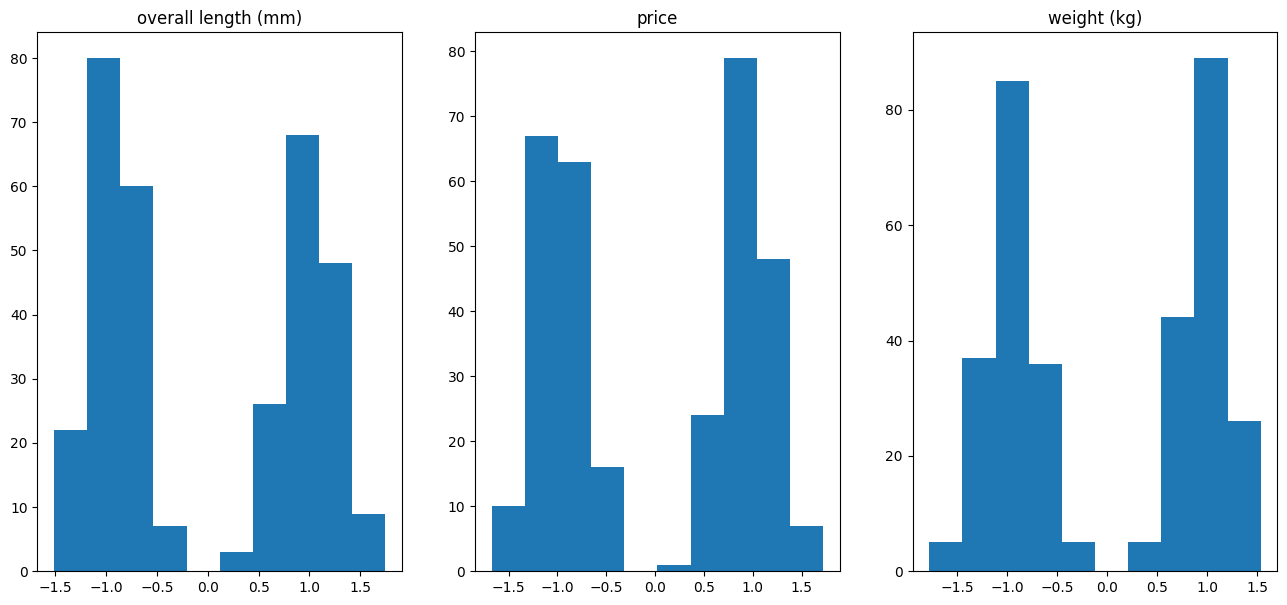

In [100]:
sc = StandardScaler()

data_x = missing_df[['overall_length_mm']]
data_y = missing_df[['price']]
data_z = missing_df[['weight_kg']]

sc.fit(data_x)
data_x_t = sc.transform(data_x)
sc.fit(data_y)
data_y_t = sc.transform(data_y)
sc.fit(data_z)
data_z_t = sc.transform(data_z)

fig, ax = plt.subplots(1, 3, figsize=(16,7))

ax[0].hist(data_x_t[:,0])
ax[0].set_title('overall length (mm)')

ax[1].hist(data_y_t[:,0])
ax[1].set_title('price')


ax[2].hist(data_z_t[:,0])
ax[2].set_title('weight (kg)')
plt.show()

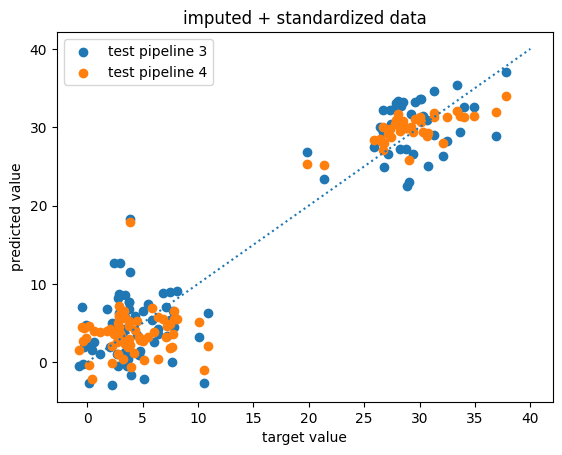

In [101]:
fig, ax = plt.subplots()

ax.scatter(test_data2['avg_rating'], pp3.predict(droppedavg_test), label='test pipeline 3')
ax.scatter(test_data2['avg_rating'], pp4.predict(droppedavg_test), label='test pipeline 4')
ax.plot([0,40],[0,40], ':')
ax.set_xlabel("target value")
ax.set_ylabel("predicted value")
ax.set_title('imputed + standardized data')
ax.legend()
plt.show()
fig.savefig("/t.pdf", bbox_inches='tight')

##The KNNImputer imputed the mean value of the 5 nearest samples and SimpleImputer calculated the fitting data mean to fill in missing data. In this case, the most frequent value was not as sensible to use as the KNNImputer method. This is most likely due to the bimodal distributions of the features.